In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
df=pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

In [5]:
df.sample(10)

,YearsExperience,Salary
26,9.5,116969.0
14,4.5,61111.0
24,8.7,109431.0
23,8.2,113812.0
20,6.8,91738.0
25,9.0,105582.0
12,4.0,56957.0
3,2.0,43525.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
model = LinearRegression()
x=df['YearsExperience']
x=np.array(x).reshape(-1,1)
y=df['Salary']

In [7]:
model.fit(x,y)

LinearRegression()

In [8]:
isinstance(model , LinearRegression)

True

In [9]:
model.intercept_

25792.200198668696

In [10]:
model.coef_

array([9449.96232146])

In [11]:
y_pred=model.predict(x)

In [12]:
mean_squared_error(y_pred , y)


31270951.722280964

In [13]:
y_ = model.coef_ * df['YearsExperience'] + model.intercept_

In [14]:
df2=df.assign(salary_pred=y_)

In [15]:
print(df2)

    YearsExperience    Salary    salary_pred
0               1.1   39343.0   36187.158752
1               1.3   46205.0   38077.151217
2               1.5   37731.0   39967.143681
3               2.0   43525.0   44692.124842
4               2.2   39891.0   46582.117306
5               2.9   56642.0   53197.090931
6               3.0   60150.0   54142.087163
7               3.2   54445.0   56032.079627
8               3.2   64445.0   56032.079627
9               3.7   57189.0   60757.060788
10              3.9   63218.0   62647.053252
11              4.0   55794.0   63592.049484
12              4.0   56957.0   63592.049484
13              4.1   57081.0   64537.045717
14              4.5   61111.0   68317.030645
15              4.9   67938.0   72097.015574
16              5.1   66029.0   73987.008038
17              5.3   83088.0   75877.000502
18              5.9   81363.0   81546.977895
19              6.0   93940.0   82491.974127
20              6.8   91738.0   90051.943985
21        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


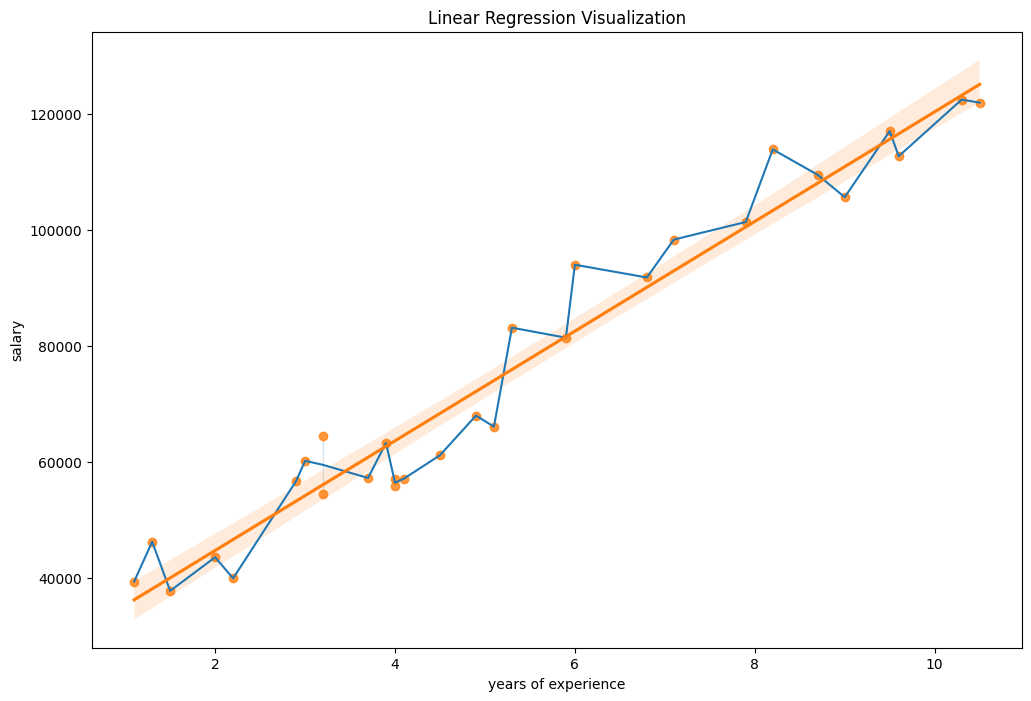

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df2, x="YearsExperience", y="Salary")
sns.regplot(data=df2, x="YearsExperience", y="Salary")
plt.title('Linear Regression Visualization')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


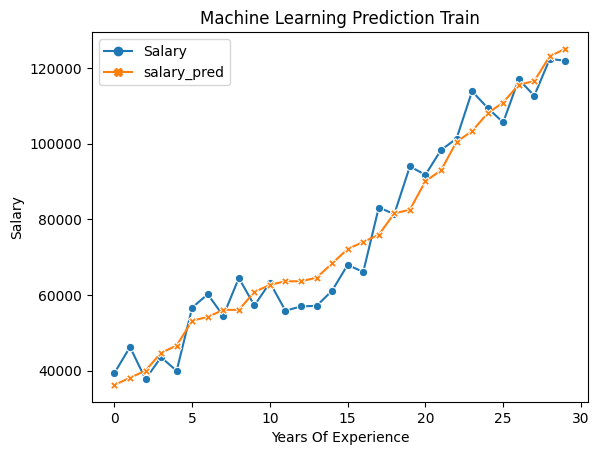

In [22]:
new_df = df2.drop('YearsExperience', axis=1)
sns.lineplot(data=new_df, markers=True, dashes=False)
plt.title('Machine Learning Prediction Train')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()